## Дипломная работа. ##  
### Тема: Анализ киноотзывов ###

Для проведения анализа киноотзывов возьмем набор данных на основе оставленных отзывов на сайте IMDb.
Этот набор данных содержит как сами отзывы, так и метки о "положительном" или "отрицательном" отзыве.
На сайте IMDb есть система оценки фильмов от 1 до 10. Для чуть более простого анализа мы сведен отзывы о фильме к двум классам: отзывы с оценкой 6 и выше будут помечены, как положительные; а остальные, как отрицательные.

Набор данных представляет собой две папки: первая - для обучения, вторая - для тестирования.
Каждая из вышеперечисленных папок, в свою очередь, содержить две подпапки: pos - содержит все положительные отзывы, neg - содержит все отрицательные отзывы.

In [1]:
#устанавливаем библиотеку mglearn для более быстрого "украшения" рисунка
!pip install mglearn

In [2]:
# Импортируем необходимые библиотеки для начального изучения и подготовки данных
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')

Импортируем дополнительную функцию load_files из библиотеки scikit-learn.
Данная функция поможет в загрузке файлов и хранении. В таком исполнении каждая вложенная папка соответствует определенной метке.

In [3]:
from sklearn.datasets import load_files

reviews_train = load_files("dpl/train/")
# load_files возвращает коллекцию, содержащую обучающие тексты и обучающие метки
text_train, y_train = reviews_train.data, reviews_train.target

# Делаем проверку на тип объекта
print("Тип text_train: {}".format(type(text_train)))

# Делаем проверку на длину объекта
print("Длина text_train: {}".format(len(text_train)))

# Для проверки пробуем напечатать отзыв с индексом 6
print("text_train[6]:\n{}".format(text_train[6]))

Тип text_train: <class 'list'>
Длина text_train: 25000
text_train[6]:
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


Получается, что это список, который содержит 25 000 элементов.
По данному примеру делаем вывод, что отзывы могут содержать теги разрыва строк - ```<br />```

Чтобы эти разрывы строк никак не сказались на нашем машинном обучении, мы делаем дальнейшее их удаление до того, как начать работать.

In [4]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

Делаем проверку на количество примеров для каждого из классов

In [5]:
print("Количество примеров на класс (обучение): {}".format(np.bincount(y_train)))

Количество примеров на класс (обучение): [    0 12500 12500]


В данном случае видим, что количество строк с отрицателными и положительными отзывами в нашем наборе одинаковое.

Также загружаем текстовые данные

In [6]:
reviews_test = load_files("dpl/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Количество документов в текстовых данных: {}".format(len(text_test)))
print("Количество примеров на класс (тест): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Количество документов в текстовых данных: 25000
Количество примеров на класс (тест): [12500 12500]


Мы хотим решить задачу, где каждому отзыву мы присвоим метку "положительный" или "отрицательный" на основе анализа его текста.
В нашем случае текстовые данные представлены в формате, который модель машинного обучения не умеет обрабатывать.
преобразовываем строковое представление текста в числовое, к которому можно будет применить алкоритм машинного обучения.

Применение модели "мешка слов" к синтетическому набору данных.

Для применения данной модели нам понадобиться класс CountVectorizer, который и выполнит соответствующее преобразование.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


Матрица X_train соответствует обучающим данным, представленным в виде "мешка слов". Данная матрица, как мы видим, имеет форму 25000x74849.

Далее попробуем проанализировать полученный словарь при помощи метода get_feature_names.
Данный метод возвращает список, в котором каждый элемент соответствует одному признаку и с этим списком уже более удобно работать.

In [8]:
feature_names = vect.get_feature_names()
print("Количество признаков: {}".format(len(feature_names)))
print('.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
print("Первые 20 признаков:\n{}".format(feature_names[:20]))
print('.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
print("Признаки с 20010 по 20030:\n{}".format(feature_names[20010:20030]))
print('.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
print("Каждый 2000-й признак:\n{}".format(feature_names[::2000]))

Количество признаков: 74849
.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Первые 20 признаков:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Признаки с 20010 по 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Каждый 2000-й признак:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'p

Из полученной информации, видим, что первые элементы словаря - числа. В данном случае, большая часть чисел не имеет особого значения, кроме, на первый взгляд, числа - 007, которое мы можем отнести к фильму об агнете Джеймсе Бонде.

Перед тем как мы попробуем улучшить выделение признаков, сделаем измерения качества модели, построив классификатор.
В данном случае у нас уже есть обучающие метки, которые хранятся в массиве y_train, и обучающие данные, которые представлены в виде "мешка слов" в массиве X_train; это все поможет обучить классификатор по имеющимся данным.
Для данных манипуляций должна подойти подель LogisticRegression с использованием перекрестной проверки.

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(max_iter=3000), X_train, y_train, cv=5)
print("Средняя правильность перекрестной проверки: {:.2f}".format(np.mean(scores)))

Средняя правильность перекрестной проверки: 0.88


Получаем среднее значение правильности перекрестной проверки равное 88%, что в целом, указывает на неплохое качество модели.

Логистическая регрессия имеет также параметр регуляотзации "C", который мы попробуем настроить с помощью перекрестной проверки.

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=3000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Наилучшие параметры: ", grid.best_params_)

Наилучшее значение перекрестной проверки: 0.89
Наилучшие параметры:  {'C': 0.1}


Используя параметр "C" со значением - 0.1, мы получаем значение перекрестной проверки равное 89%. Теперь мы сможем оценить на тестовом наборе обопщающую способность модели при использовании данного значения параметра ее настройки.

In [11]:
X_test = vect.transform(text_test)
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(X_test, y_test)))

Правильность на тестовом наборе: 0.06


После всего полученного, попробуем улучшить процесс извлечения слов.
Так как класс CountVectorizer извлекает токены с помощью регулярных выражений, а по умолчанию используются следующие регулярные выражения - "\b\w\w+\b".
Данный простой принцип неплохо себя показывает на практике, но в нашем случае мы получаем достаточное количество неинформативных признаков - чисел. Попробуем решить данную проблему, используя только те токены, которые встречаются по крайней мере в пяти документах (задаем при помощи параметра min_df). Токен, который встретился только в одном документе, врят ли встретится в тестовом наборе и поэтому бесполезен.

In [12]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train c min_df: {}".format(repr(X_train)))

X_train c min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


При помощи параметра min_df, который в нашем случае равен 5 (токен встречается по крайней мере в 5 документах), мы уменьшили количество признаков до 27 271, и получается, что в таком случае используется только треть исходных признаков.

Смотрим на токены, но уже в сокращенном словаре.

In [13]:
feature_names = vect.get_feature_names()

print("Первые 50 признаков:\n{}".format(feature_names[:50]))
print("Признаки с 20010 по 20030:\n{}".format(feature_names[20010:20030]))
print("Каждый 700-й признак:\n{}".format(feature_names[::700]))

Первые 50 признаков:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Признаки с 20010 по 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Каждый 700-й признак:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronun

Стали реже встречаться числа и исчезли некоторые странные, неправильно написанные слова.

Оцениваем качество модели при помощи решетчатого поиска.

In [14]:
grid = GridSearchCV(LogisticRegression(max_iter=3000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значениеперекрестной проверки: {:.2f}".format(grid.best_score_))

Наилучшее значениеперекрестной проверки: 0.89


Наилучшее значение правильности все еще равно 89%. У нас не получилось улучшить качество модели, хотя, сокращение количества признаков ускорело предварительную обработку, а бесполезные признаки которые мы исключили должны будут помочь нам в улучшение интерпретабельности модели.

### Стоп-слова

При помощи использования метода стоп-слов избавляемся от слов, которые встречаются слишком часто, чтобы быть информативными.
Так как оцениваем отзывы на английском языке, то и использовать будем модуль feature_extraction.text со списком английских стоп-слов.

In [15]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Количество стоп-слов: {}".format(len(ENGLISH_STOP_WORDS)))
print("Каждое 10-е стоп-слово:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Количество стоп-слов: 318
Каждое 10-е стоп-слово:
['may', 'first', 'another', 'hundred', 'go', 'whereby', 'herself', 'their', 'put', 'yourself', 'keep', 'so', 'to', 'fifteen', 'where', 'find', 'seeming', 'hers', 'then', 'whom', 'mine', 'such', 'among', 'yours', 'whereupon', 'otherwise', 'sometime', 'call', 'are', 'do', 'a', 'also']


Удаление стоп-слов с помощью подобного списка уменьшает количество признаков лишь на то количество, которое есть в этом списке.

Проверяем, как это сказалось на качестве модели.

In [16]:
# Настройка stop_words="english" задает встроенный список стоп-слов.
# Мы можем также расширить его и передать свой собственный.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train с использованием стоп-слов:\n{}".format(repr(X_train)))

X_train с использованием стоп-слов:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


Мы видим, что у нас стало на 305 признаков меньше (уменьшилось с 27271 до 26966). Получается, что большинство, хоть и не все, стоп-слова встретились в документах корпуса.

Попробуем еще раз решетчатый поиск.

In [17]:
grid = GridSearchCV(LogisticRegression(max_iter=3000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))

Наилучшее значение перекрестной проверки: 0.88


Видно, что при использовании стоп-слов качество модели стало чуть хуже.
Так как было исключено 305 признаков из более чем 27 000, то врятли измениться качество или интерпретабельность модели.
Получается, что в данном текущем случае использование списка стоп-слов не сыграло какой-либо роли.

### Метод tf-idf

Теперь попробуем масштабировать признаки в зависимости от степени их информативности. Будем присваивать больший вес термину, который часто встречается в конкретном документе, но при этом редко встречается в остальных документах корпуса.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression(max_iter=3000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))

Наилучшее значение перекрестной проверки: 0.89


Из получившегося результата видим, что применение преобразования tf-idf вместо обычных частот слов дало определенное улучшение.
Также в данном преобраховании tf-idf мы можем выяснить какие слова стали наиболее важными.
Но тут есть шанс, что мы получаем "важные" слова, которые в свою очередь не обязательно будут связаны с необходимыми нам метками "положительный отзыв" или "отрицательный отзыв".

In [19]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]

#Преобразуем обучающий набор данных
X_train = vectorizer.transform(text_train)

#Находим максимальное значение каждого признака по набору данных
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

#Получаем имена признаков
feature_names = np.array(vectorizer.get_feature_names())

print("Признаки с наименьшими значениями tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Признаки с наибольшими значениями tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Признаки с наименьшими значениями tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
Признаки с наибольшими значениями tfidf: 
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


Получаем список с низкими (признаки, которые или встречаются во многих документах, или используются редко и только в очень длинных документах) значениями метрики tfidf и с высокими.

Теперь попробуем найти слова, которые имеют низкое значение обратной частоты документа (слова встречаются часто и считаются менее важными). В этом поможет атрибут idf_, который хранит в себе значения обратной частоты документа.

In [20]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Признаки с наименьшими значениями idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Признаки с наименьшими значениями idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


Из списка признаков с наименьшими значениями, как видно, слова с низкими значениями метрики tf-idf стали английские стоп-слова, такие как, "the", "no", "but" и т.д. Но также встречаются и характерные слова именно для отзывов о кино, а именно: "movies", "film". 
В соответствии с метрикой tf-idf мы также получили в списке часто встречаемых слова - "good", "great", "bad". 

### Исследование коэффициентов модели

Сделаем более подробный анализ данных, полученных при помощи модели логистической регрессии.
Так как у нас достаточно большое количество признаков (более 25 000), то у нас не получится просмотреть все коэффициенты сразу.
Однако, мы можем изучить коэффициенты, которые получили максимальное значение, а также сопоставить их со словами.
Ниже можем увидеть наибольшие и наименьшие коэффициенты модели логистической регрессии.

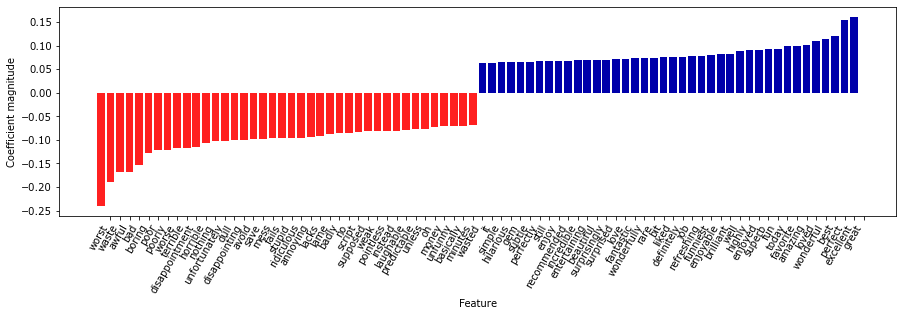

In [21]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

По гистограмме видим, какие слова относятся к негативным отзывам (левая красная часть на графике) и позитивным (правая синяя часть на графике).
С большей частью терминов вопрос понятен, как вариант: "worst", "bad", "poor" - это сразу видно, что отзывы о плохих фильмах; "great", "best", "well" - отзывы о хороших.
Такие слова, как "still", "save" не так очевидны для тональности отзывов, но они могут встречаться в таких фраза, как "still goog" - положительный отзыв; "save time and don't watch" - отрицательный отзыв.

### "Мешок слов" для последовательностей из нескольких слов (n-грамм)

Так как "мешок слов" игнорирует порядок слов и из-за этого разные по смыслу фразы ("it's bad, not good", и "it's good, not bad") будут иметь одинаковое представление, но в действительности будут разные по смыслу.  
Для этого будем использовать способ, который позволяет учитывать контекст при использовании "мешка слов" - n-граммы.  
При помощи параметра ngram_range будем менять диапазон токенов, которые рассматриваются в качестве признаков. Данный параметр задает нижнюю и верхнюю границы диапазона из n-значений для различных извлекаемых n-грамм.  
Попробуем найти оптимальное значение параметра ngram_range.

In [22]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=3000))
#Исполнение решетчатого поиска займет много времени из-за относительно большой сетки параметров и включения триграмм
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Наилучшие параметры:\n{}".format(grid.best_params_))

Наилучшее значение перекрестной проверки: 0.91
Наилучшие параметры:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


Из полученных результатов мы можем увидеть, что мы улучшили качество чуть больше, чем на один процент, добавив биграммы и триграммы. Мы можем представить правильность перекрестной проверки в виде функции параметров ngram_range и C, использовав теплокарту.

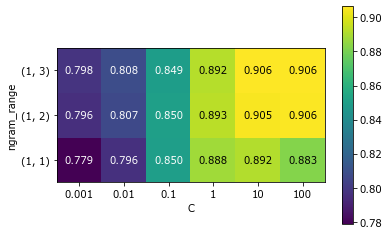

In [23]:
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

По данным из теплокарты мы видим, что использование биграмм довольно значительно увеличивает качество модели, тогда как добавление триграмм дает очень небольшое преимущество с точки зрения правильности. Чтобы понять, как повысилось качество модели, мы можем визуализировать наиболее важные коэффициенты наилучшей модели, которая включает юниграммы, биграммы и триграммы.

(-22.0, 22.0)

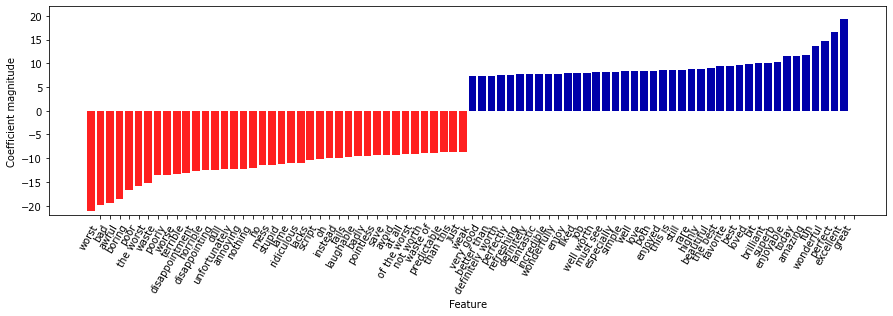

In [24]:
#Извлекаем названия признаков и коэффициенты
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.ylim(-22, 22)

Теперь попробуем визуализировать только триграммы, чтобы лучше прнять, какие признаки являются полезными.

(-22.0, 22.0)

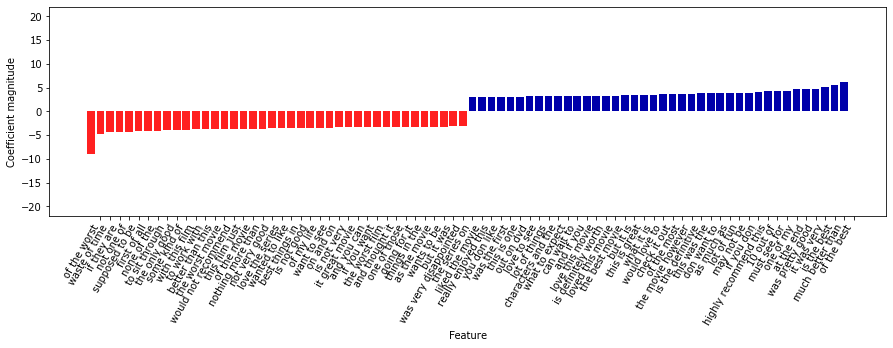

In [25]:
#Находим триграммные признаки
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
#Визуализируем только 3-граммные признаки
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)

### Латентное размещение Дирихле (LDA)

Применим метод LDA к киноотзывам.  
Для этого мы удалим слова, которые появляются по крайне мере в 15% документов, и ограничим модель "мешка слов" до 10 000 слов,
которые представляют собой наиболее часто встречающиеся слова, оставшиеся после удаления.

In [26]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

Теперь посмотри на модель, выделив всего 10 тем, что довольно мало для рассмотрения всех возможных вариантов. Темы не имеют какого-то внутреннего порядка и изменеие количество извлекаемых тем изменит содержательную суть всех тем.  
Воспользуемся методом обучения "batch". Он работает немного медленнее метода "online", но "batch", обычно, дает более лучший результат. Также увеличим значение параметра max_iter, что также должно будет отразится на качестве результата в лучшую сторону.

In [27]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=25, random_state=0)

# Мы строим модель и преобразуем данные в один этап. Преобразование занимает время и, чтобы сэкономить время
# выполняем обе операции сразу
document_topics = lda.fit_transform(X)

In [28]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


Для понимания содержания каждой из тем, делаем анализ по наиболее важным словам для каждой из них.

In [29]:
# Для каждой темы сортируем признаки по возрастанию
# Инвертируем строки, чтобы получить сортировку по убыванию
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# Получаем имена признаков из векторизатора
feature_names = np.array(vect.get_feature_names())

In [30]:
# Выводим 10 тем:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

Судя по словам, учавствующим в той или иной теме, можно предположить, что в первая соответствует военным или историческим фильмам, вторая - скорее всего, спеицифичным комедиям; третья - сериалам и тв-шоу.

Теперь построим еще одну модель, но выделив уже 100 тем. Это усложнит анализ, но повысит вероятность найти из полученных тем интересные подмножества данных.

In [31]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

Чтобы не выводить все 100 тем, выберем лишь произвольные и посмотрим на них.

In [32]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [33]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     
suspense      awful         hitler        gets          young         
horror        boring        nazi          guy           old           
atmosphere    horrible      midnight      around        romantic      
mystery       stupid        joe           down          between       
house         thing         germany       kill          romance       
director      terrible      years         goes          wonderful     
quite         script        history       killed        heart         
bit           nothing       new           going         feel          
de            worse         modesty       house         year          
performances  waste         cowboy        away          each          
dark          pretty        jewish        head          french        
twist 

Теперь же получили более конкретные темы, но некоторые из них уже сложднее интерпретировать.  
Тема 7, очень похоже на то, что соответствует триллерам и фильмам ужасов; темы 16 и 54 - плохие отзывы, а тема 63 - соответсвует хорошим комедиям. Тема 45 связана с музыкой.

Посмотрим отзывы, которые отнесены к 45 теме, связанные с музыкой.

In [34]:
# Сортируем документы по весу тему 45 "музыка"
music = np.argsort(document_topics100[:, 45])[::-1]

# Выведем 5 документов, в которых эта тема является наиболее важной
for i in music[:10]:
    # Выводим первые два предложения
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

Из полученных выводов можно увидеть, что данная тема охватывает отзывы по музыке, мюзиклам, фильмам о биографии.  
Теперь попробуем исследовать темы путем какой вес получает каждая тема в целом, просуммировав значения параметра document_topics по всем отызвам. Каждой теме будет дано название, в зависимости отдвух самых часто встречаемых слов.

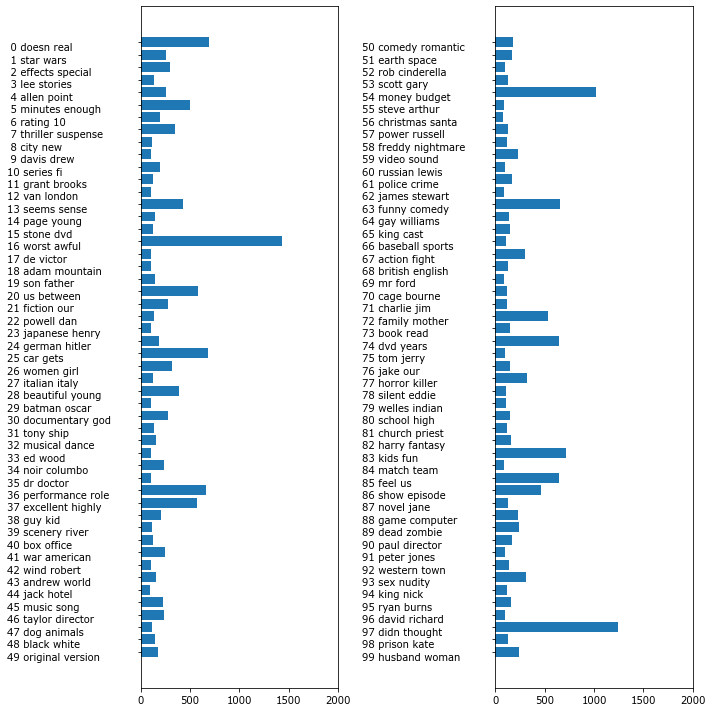

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# две столбцовые диаграммы
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

Наиболее важными темами, как мы видим из графиков являются темы 16, 54 и 97, которые очень похожи на отрицательные отзывы.  
Похоже, что алгоритм LDA в основном выделил два типа тем: темы, описывающие жанровые особенности фильмов, и темы, обосновывающие ту или иную рейтинговую оценку. Кроме того, несколько тем не удалось отнести к конкретному типу. Это интересное открытие, так как большинство отзывов составлены из нескольких комментариев, связанных с жанром описываемого фильма, и нескольких комментариев, в которых автор обосновывает или подчеркивает свою оченку.